In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
X, y = make_classification(n_samples=500, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_classes=2, random_state=42)

# convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # shape (500,1)

In [16]:
print(f"X shape: {X.shape}") ### 2 features per sample
print(f"y shape: {y.shape}") ### 1 for binary class
print(f"X size: {X.numel()}")
print(f"y size: {y.numel()}")

X shape: torch.Size([500, 2])
y shape: torch.Size([500, 1])
X size: 1000
y size: 500


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [18]:
print(f"X train : {len(X_train)}")
print(f"y train : {len(y_train)}")
print(f"y test : {len(X_test)}")
print(f"y test : {len(y_test)}")

X train : 400
y train : 400
y test : 100
y test : 100


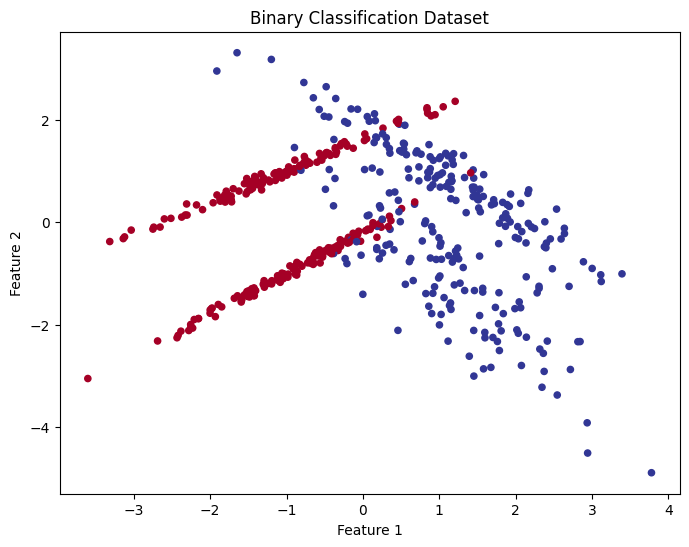

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.RdYlBu, s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()

### **Logistic Regression Model** 

In [20]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,n_features):
        super().__init__()
        self.linear = nn.Linear(in_features=n_features,out_features=1,bias=True)

    def forward(self,x):
        return torch.sigmoid(self.linear(x))

In [22]:
model = LogisticRegressionModel(n_features=2)


In [23]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0144,  0.3278]])),
             ('linear.bias', tensor([0.0928]))])

### **Loss and Opimizer**

In [24]:
loss_fn = nn.BCELoss() #binary cross entropy
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [55]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    #1. make a forward pass
    y_pred = model(X_train)

    #2. caclulate the loss
    loss = loss_fn(y_pred,y_train)

    #3. optimzer zero grad
    optimizer.zero_grad()

    #4. lass backward prop
    loss.backward()

    #5. optimizer step
    optimizer.step()

    if epoch%100 == 0:
        print(f"Epoch : {epoch} | Loss : {loss}")

with torch.inference_mode():
    y_pred_test = model(X_test)
    test_loss = loss_fn(y_pred_test, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Epoch : 0 | Loss : 0.275755375623703
Epoch : 100 | Loss : 0.275755375623703
Epoch : 200 | Loss : 0.275755375623703
Epoch : 300 | Loss : 0.275755375623703
Epoch : 400 | Loss : 0.275755375623703
Epoch : 500 | Loss : 0.275755375623703
Epoch : 600 | Loss : 0.275755375623703
Epoch : 700 | Loss : 0.275755375623703
Epoch : 800 | Loss : 0.275755375623703
Epoch : 900 | Loss : 0.275755375623703
Test Loss: 0.2999
